# 1. Dataset for emotion prediction

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

'0': sadness
               '1': joy
               '2': love
               '3': anger
               '4': fear
               '5': surprise

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset
dataset = load_dataset('json', data_files={'train': 'train.jsonl','test':'validation.jsonl'})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
#!py -m pip install nltk

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'accepted', 'aching', 'actually', 'admit',
       'afraid', 'agitated', 'ago', 'almost', 'alone', 'already', 'also',
       'always', 'amazed', 'amazing', 'amp', 'angry', 'annoyed',
       'another', 'anxious', 'anymore', 'anyone', 'anything',
       'apprehensive', 'around', 'ashamed', 'ask', 'asked', 'assured',
       'away', 'awful', 'awkward', 'baby', 'back', 'bad', 'beaten',
       'beautiful', 'become', 'bed', 'began', 'believe', 'beloved',
       'best', 'better', 'big', 'bit', 'blank', 'blessed', 'blog', 'body',
       'book', 'books', 'bothered', 'brave', 'burdened', 'call', 'calm',
       'came', 'cannot', 'cant', 'care', 'caring', 'cause', 'certain',
       'change', 'child', 'children', 'class', 'close', 'cold', 'come',
       'comes', 'comfortable', 'coming', 'completely', 'confident',
       'confused', 'content', 'control', 'convinced', 'cool', 'could',
       'couldnt', 'cranky', 'creative', 'curious', 'cute', 'dangerous',
       'day', 'day

In [7]:
X_train_vec[:1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
X_train_vec[:1].toarray().sum()

2

In [9]:
dataset['train']['text'][:1]

['i didnt feel humiliated']

In [10]:
vocabulary = vectorizer.get_feature_names_out()

In [11]:
len(vocabulary)

500

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

In [13]:
tfidf = TfidfTransformer()

In [14]:
X_train_idf = tfidf.fit_transform(X_train_vec)

In [15]:
X_train_idf[:1].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [16]:
X_train_idf[:1].toarray().sum()

1.2295066506768701

In [17]:
X_test_vec = vectorizer.transform(dataset['test']['text'])

In [18]:
X_test_idf = tfidf.transform(X_test_vec)

In [19]:
X_test_idf[:1].toarray().sum()

2.52371815232768

In [20]:
X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

In [21]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
X_train, X_test, y_train, y_test = X_train,X_test,dataset['train']['label'],\
                            dataset['test']['label']

# 2. AdaBoost

In [24]:
# обучение на объектах, неверно классифицированных на предыдущем шаге

In [25]:
cur_tree = DecisionTreeClassifier(random_state=42, max_depth = 6)
abc = AdaBoostClassifier(estimator = cur_tree,n_estimators=100,
                                 learning_rate=1.0) # DecisionTreeClassifier <-default
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.556


In [26]:
import pickle

filename = "./models/AdaBoost_100_6.pickle"
pickle.dump(model, open(filename, "wb"))

FileNotFoundError: [Errno 2] No such file or directory: './models/AdaBoost_100_6.pickle'

# 3. GradientBoosting

In [27]:
# обучение в направлн

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 5,
                                         max_depth = 6, random_state=42)

model = gbc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5005


In [ ]:
filename = "./models/GBC_100_6.pickle"

pickle.dump(model, open(filename, "wb"))
#loaded_model = pickle.load(open(filename, "rb"))

In [42]:
X_train_0, X_train_1, y_train_0, y_train_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# 3. Blending

In [43]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

N = 10
y_pred_1 = []
crf = []

for n in range(1, N+1):
    crf.append(RandomForestClassifier(n_estimators=2, max_depth=2, random_state=n))
    crf[-1].fit(X_train_0, y_train_0)
    y_pred_1.append(crf[-1].predict(X_train_1).reshape(len(X_train_1), 1))

y_pred_1t = np.array(y_pred_1).transpose()[0]  # Перенос на новую строку
# y_pred_1 = hstack(y_pred_1)

len(y_pred_1t[0])


10

In [44]:
y_pred_1t = np.array(y_pred_1).transpose()[0]
#y_pred_1 = hstack(y_pred_1)
len(y_pred_1t[0])

10

In [45]:
len(y_pred_1t)

5280

In [46]:
clf_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

In [47]:
clf_final.fit(y_pred_1t,y_train_1)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [48]:
def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_blending_prediction(crf,clf_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.405

In [49]:
metrics.accuracy_score(y_test, crf[0].predict(X_test))

0.362

# 4. Stacking

In [31]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier

N = 10
y_pred_1 = []
crf_stack = []
kf = KFold(n_splits=N, random_state=None, shuffle=False)

x_test_2 = []
y_test_2 = []

pre_prediction = np.zeros((len(X_train), N))

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]

    crf_stack.append(RandomForestClassifier(n_estimators = 2,max_depth=2, random_state=i))
    crf_stack[-1].fit(X_train_0,y_train_0)
    pre_prediction[test_index,i]=crf_stack[-1].predict(X_test_1)

In [39]:
clf_stack_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

In [40]:
clf_stack_final.fit(pre_prediction,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

In [34]:
def make_stacking_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.413

In [35]:
metrics.accuracy_score(y_test, crf_stack[0].predict(X_test))

0.368

In [ ]:
# Задача. Варьируя параметры ансамбля в подходам блэндинг и стэкинг, обучить оптимальный классификатор.
# Визуализировать графики зависимости предсказания от параметров модели.

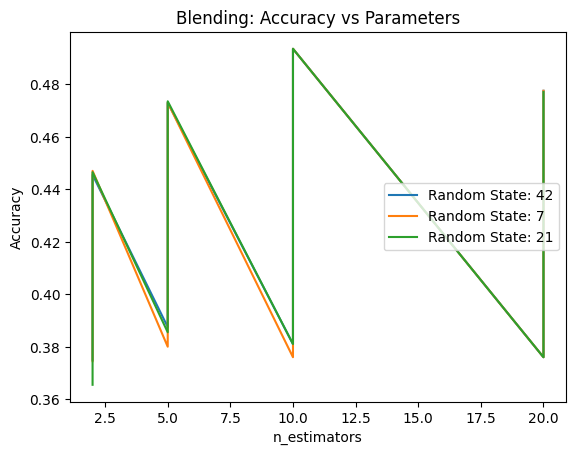

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Параметры для исследования
n_estimators_range = [2, 5, 10, 20]
max_depth_range = [2, 4, 6, 8]
random_states = [42, 7, 21]

blending_accuracies = []

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for random_state in random_states:
            # Создаем базовые классификаторы
            crf = [RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=rs) for rs in random_states]
            for clf in crf:
                clf.fit(X_train_0, y_train_0)

            # Получаем предсказания базовых классификаторов
            y_pred_1 = [clf.predict(X_train_1).reshape(len(X_train_1), 1) for clf in crf]
            y_pred_1t = np.array(y_pred_1).transpose()[0]

            # Финальный классификатор
            clf_final = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
            clf_final.fit(y_pred_1t, y_train_1)

            # Оцениваем точность на тестовых данных
            y_test_pred = make_blending_prediction(crf, clf_final, X_test)
            acc = accuracy_score(y_test, y_test_pred)
            blending_accuracies.append((n_estimators, max_depth, random_state, acc))

# Построение графика
blending_accuracies = np.array(blending_accuracies)
for random_state in random_states:
    plt.plot(blending_accuracies[blending_accuracies[:, 2] == random_state][:, 0],
             blending_accuracies[blending_accuracies[:, 2] == random_state][:, 3],
             label=f"Random State: {random_state}")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Blending: Accuracy vs Parameters")
plt.legend()
plt.show()


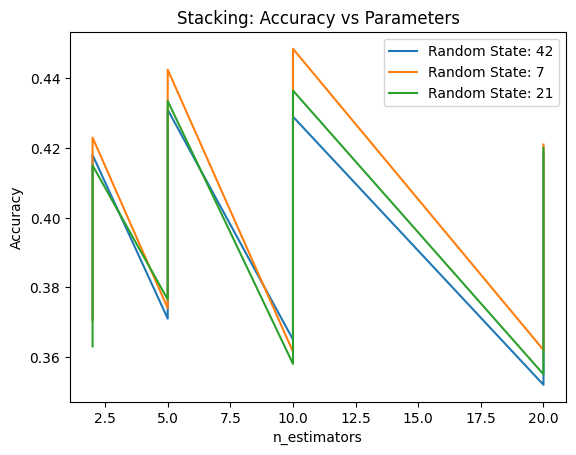

In [37]:
stacking_accuracies = []

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for random_state in random_states:
            # Кросс-валидация для базовых классификаторов
            kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
            pre_prediction = np.zeros((len(X_train), 10))

            crf_stack = []
            for i, (train_idx, test_idx) in enumerate(kf.split(X_train)):
                X_train_0, X_test_1 = np.array(X_train)[train_idx], np.array(X_train)[test_idx]
                y_train_0, y_test_1 = np.array(y_train)[train_idx], np.array(y_train)[test_idx]

                clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
                clf.fit(X_train_0, y_train_0)
                crf_stack.append(clf)

                pre_prediction[test_idx, i] = clf.predict(X_test_1)

            # Финальный классификатор
            clf_stack_final = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
            clf_stack_final.fit(pre_prediction, y_train)

            # Оцениваем точность на тестовых данных
            y_test_pred = make_stacking_prediction(crf_stack, clf_stack_final, X_test)
            acc = accuracy_score(y_test, y_test_pred)
            stacking_accuracies.append((n_estimators, max_depth, random_state, acc))

# Построение графика
stacking_accuracies = np.array(stacking_accuracies)
for random_state in random_states:
    plt.plot(stacking_accuracies[stacking_accuracies[:, 2] == random_state][:, 0],
             stacking_accuracies[stacking_accuracies[:, 2] == random_state][:, 3],
             label=f"Random State: {random_state}")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Stacking: Accuracy vs Parameters")
plt.legend()
plt.show()
